<b>Independent Component Analysis (ICA) is a computational technique used in signal processing and data analysis. It is particularly employed in scenarios where the goal is to separate a multivariate signal into additive, independent components. The fundamental idea behind ICA is to find a linear transformation of the observed data such that the resulting components are statistically as independent as possible.</b>

Here are some key points about Independent Component Analysis:

<b>Independence:</b>

*   ICA assumes that the observed data is a linear combination of independent
    source signals. The goal is to find a demixing matrix that can recover these independent sources.

<b>Statistical Independence:</b>

*   Unlike techniques such as Principal Component Analysis (PCA), which focuses
    on capturing variance, ICA is concerned with finding components that are statistically independent, which is a stronger requirement.

<b>Applications:</b>

*   <b>Signal Separation:</b>

    *   ICA is commonly used for blind source separation in scenarios where
        multiple sources contribute to a set of observed signals. For example, in speech processing, it can be used to separate voices from background noise.

*   <b>Neuroscience:</b>

    *   In neuroscience, ICA is applied to separate brain signals recorded
        through techniques like electroencephalography (EEG) or functional magnetic resonance imaging (fMRI).

*   <b>Image Processing:</b>

    *   ICA has applications in image processing for separating mixed images
        into their independent components.

*   <b>Mathematical Formulation:</b>

    *   Mathematically, ICA can be expressed as finding a matrix <b> W </b> such
        that the output = <b> S=WX </b>, where <b> S </b> is the matrix of independent source signals and <b> X </b>is the observed data matrix.

*   <b>Algorithms:</b>

    *   There are various algorithms used to perform ICA, including FastICA,
        Infomax, and others. These algorithms iteratively adjust the demixing matrix to maximize the non-Gaussianity or independence of the estimated sources.

<b>Challenges:</b>

*   ICA assumes a linear mixing model and may not perform well if the
    underlying mixing process is highly nonlinear. Additionally, the order of the sources cannot be determined uniquely, and the results may be sensitive to the initial conditions.

## Load the breast cancer dataset from sklearn

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import FastICA
import numpy as np
import pandas as pd

cancer = load_breast_cancer()

In [31]:
data = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data['Target'] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Seperate the input (x) and output features (y)

In [32]:
x = data.drop(['Target'],axis=1)
y = data['Target']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [33]:
x.shape

(569, 30)

## Train the model

In [34]:
ica = FastICA(n_components=2)
transformed_x = ica.fit_transform(x)  # estimated independent sources
transformed_x.shape

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


(569, 2)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
xtrain,xtest,ytrain,ytest = train_test_split(transformed_x,y,train_size=0.8,random_state=6)
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
result = model.score(xtest,ytest)
print(result)

0.543859649122807


## Comparision with PCA

In [36]:
from sklearn.decomposition import PCA
my_pca = PCA(n_components=2)
my_pca.fit(x)
x_pca = my_pca.transform(x)

print(x_pca)

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


### The features obtained are the 2d eigen vectors

In [37]:
x_pca.shape

(569, 2)

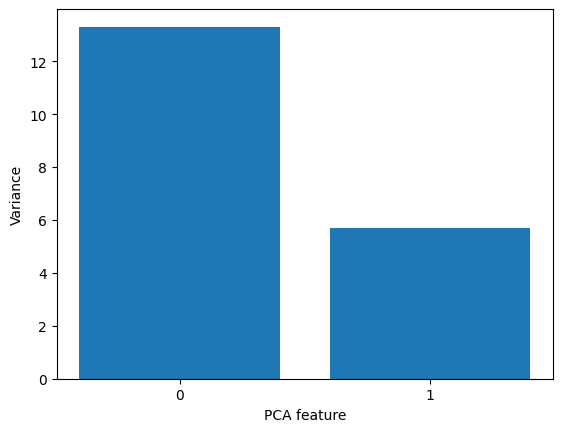

In [38]:
# Plot the explained variances

import matplotlib.pyplot as plt

features = range(my_pca.n_components_)
plt.bar(features, my_pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()


In [39]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Import model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
xtrain,xtest,ytrain,ytest = train_test_split(x_pca,y,train_size=0.8,random_state=6)
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
result = model.score(xtest,ytest)
print(result)

0.9473684210526315
